# Unit 5 - Financial Planning

In [26]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load .env enviroment variables
from dotenv import load_dotenv,find_dotenv # a more acurate line of code to locate .env file
load_dotenv(find_dotenv(r"C:\Users\Weesam\Documents\Python\example.env")) #Location of my .env file

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Creating Alpaca API Object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [28]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [29]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD" # Link to BTC API
btc_url= btc_url+"?format=json" # Format link to JSON format
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD" # Link to ETH API
eth_url= eth_url+"?format=json" # Format link to JSON format

In [30]:
# Fetch current BTC price
btc_data=requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD") # New variable to contain BTC link and using the request command to retrive the link
data1=btc_data.json() # Reads the data in a JSON format
btc_price=data1["data"]["1"]["quotes"]["CAD"]["price"] # Specifying where im grabbing BTC price

# Fetch current ETH price
eth_data=requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD") # New variable to contain ETH link and using the request command to retrive the link
data2=eth_data.json() # Reads the data in a JSON format
eth_price=data2["data"]["1027"]["quotes"]["CAD"]["price"] # Specifying where im grabbing ETH price


# Compute current value of my crpto
total_btc_price= my_btc*btc_price # Current Price of BTC * Number of BTC Shares
total_eth_price=my_eth*eth_price # Current Price of ETH * Number of ETH Shares

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${total_btc_price:0.2f}") # Display Current Value of BTC Balance
print(f"The current value of your {my_eth} ETH is ${total_eth_price:0.2f}") # Display Current Value of ETH Balance

The current value of your 1.2 BTC is $42761.78
The current value of your 5.3 ETH is $11420.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [31]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [32]:
# Set Alpaca API key and secret
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
api= tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [33]:
# Format current date as ISO format
today = pd.Timestamp("2023-09-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_portfolio[stock_portfolio['symbol']=='SPY'].drop('symbol', axis=1) # Seperating SPY Ticker
AGG = stock_portfolio[stock_portfolio['symbol']=='AGG'].drop('symbol', axis=1) # Seperating AGG Ticker

# Concatenate the ticker DataFrames
stock_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG']) 

# Preview DataFrame
stock_portfolio

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-09-25 04:00:00+00:00  429.17  432.27  428.72  432.23  70643602   

                                                     AGG                   \
                          trade_count        vwap   open     high     low   
timestamp                                                                   
2023-09-25 04:00:00+00:00      486205  430.899554  94.49  94.6175  94.285   

                                                                 
                          close   volume trade_count       vwap  
timestamp                                                        
2023-09-25 04:00:00+00:00  94.3  6476769       25126  94.433166

In [34]:
# Pick AGG and SPY close prices
spy_price_close = float(stock_portfolio["SPY"]["close"]) # Display SPY Closing Price
agg_price_close = float(stock_portfolio["AGG"]["close"]) # Display AGG Closing Price

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price_close}")  # Print SPY close prices
print(f"Current SPY closing price: ${spy_price_close}") # Print AGG  close prices

Current AGG closing price: $94.3
Current SPY closing price: $432.23


In [35]:
# Compute the current value of shares
spy_value = spy_price_close * my_spy # Closing Price of SPY * Shares of SPY
agg_value = agg_price_close * my_agg # Closing Price of AGG * Shares of AGG    

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}") # Print Current Value of close prices
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}") # Print SPY close prices

The current value of your 50 SPY shares is $21611.50
The current value of your 200 AGG shares is $18860.00


### Savings Health Analysis

In [36]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
total_crypto= total_btc_price + total_eth_price  # Total price of BTC + Total price of ETH 
total_shares= spy_value + agg_value  # Total Shares of SPY + Total Shares of AGG


# Create savings DataFrame
savings_data = {
    "Amount": [total_crypto, total_shares] # Name of Columns
}

tickers = ["Crypto", "Shares"] # Name of Tickers

total_savings_data = pd.DataFrame(savings_data, index=tickers) # Dataframe Creation

# Display savings DataFrame
total_savings_data

,Amount
Crypto,54182.063507
Shares,40471.500000


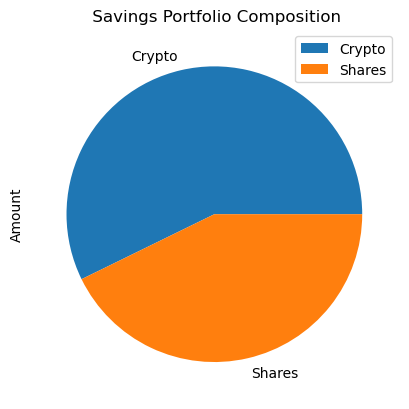

In [37]:
# Plot savings pie chart
total_savings_data.plot.pie(y="Amount", title=" Savings Portfolio Composition");

In [72]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_saving = total_shares + total_crypto # New variable to add total shares of Crypto and Stocks
print("Emergency Fund:", emergency_fund) # Prints Emergency Fund
print("Total Amount Saving:", total_amount_saving) # Prints Total Amount Saving

# Validate saving health with a If Loop
if emergency_fund < total_amount_saving: # Bigger than emergency fund
    print("Congratulations! You have more savings than your emergency fund!") # Print Statement

if emergency_fund == total_amount_saving: # Equal to emergency fund
    print("Congratulations! You have reached your goal of the emergency fund.") # Print Statement

if emergency_fund > total_amount_saving: # Less than emergency fund
    shortfall = emergency_fund - total_amount_saving #Determine the amount needed to reach goal
    print(f"You are below the emergency fund amount. You need to save an additional ${shortfall:.2f} to reach your goal.") # Print Statement

Emergency Fund: 36000
Total Amount Saving: 94653.56350699998
Congratulations! You have more savings than your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [67]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [68]:
#Initiliaze Alpaca Keys 
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api= tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


# Set Ticker Information
tickers = ["SPY", "AGG"]
# Get 5 years' worth of historical data for SPY and AGG
five_year_port = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = five_year_port[five_year_port['symbol']=='SPY'].drop('symbol', axis=1) # Seperating SPY Ticker
AGG = five_year_port[five_year_port['symbol']=='AGG'].drop('symbol', axis=1)# Seperating AGG Ticker


# Concatenate the ticker DataFrames
new_port_five_year = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG']) # New Dataframe to hold both Stocks

# Display sample data
new_port_five_year.head(1000) #Display Dataframe

SPY                                         \
                             open      high     low     close     volume   
timestamp                                                                  
2016-05-02 04:00:00+00:00  206.92  208.1800  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.8000  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.8500  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.9800  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.7700  203.88  205.7200   89131004   
...                           ...       ...     ...       ...        ...   
2020-04-15 04:00:00+00:00  277.57  283.9407  275.46  277.7500  121779042   
2020-04-16 04:00:00+00:00  279.15  280.0300  275.76  278.9600  132398585   
2020-04-17 04:00:00+00:00  285.38  287.3000  282.40  286.5400  146685294   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.7600  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.1700  126385698   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   
...                               ...         ...     ...       ...       ...   
2020-04-15 04:00:00+00:00      711140  277.826041  117.03  117.3050  116.7100   
2020-04-16 04:00:00+00:00      748801  278.840675  117.19  117.5250  117.1900   
2020-04-17 04:00:00+00:00      699788  284.307868  117.52  117.6200  117.0350   
2020-04-20 04:00:00+00:00      600459  283.731259  117.15  117.2800  116.9400   
2020-04-21 04:00:00+00:00      923551  274.755317  117.43  117.4400  117.0700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967  
...                            ...      ...         ...         ...  
2020-04-15 04:00:00+00:00  117.240  4367410       19620  117.144915  
2020-04-16 04:00:00+00:00  117.390  4744716       16906  117.399687  
2020-04-17 04:00:00+00:00  117.250  4949824       25621  117.358347  
2020-04-20 04:00:00+00:00  117.080  3847904       18508  117.030930  
2020-04-21 04:00:00+00:00  117.140  4660507       19425  117.166762  

[1000 rows x 14 columns]

In [71]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = new_port_five_year,#Specifying where to pull data
    weights = [.60,.40],#Weight of the stock
    num_simulation = 500,# Number of times the simulation is running
    num_trading_days = 252*30 # specifiying the years
)

In [45]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head(1000)

SPY                                         \
                             open      high     low     close     volume   
timestamp                                                                  
2016-05-02 04:00:00+00:00  206.92  208.1800  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.8000  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.8500  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.9800  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.7700  203.88  205.7200   89131004   
...                           ...       ...     ...       ...        ...   
2020-04-15 04:00:00+00:00  277.57  283.9407  275.46  277.7500  121779042   
2020-04-16 04:00:00+00:00  279.15  280.0300  275.76  278.9600  132398585   
2020-04-17 04:00:00+00:00  285.38  287.3000  282.40  286.5400  146685294   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.7600  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.1700  126385698   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   
...                               ...         ...          ...     ...   
2020-04-15 04:00:00+00:00      711140  277.826041    -0.021318  117.03   
2020-04-16 04:00:00+00:00      748801  278.840675     0.004356  117.19   
2020-04-17 04:00:00+00:00      699788  284.307868     0.027172  117.52   
2020-04-20 04:00:00+00:00      600459  283.731259    -0.016682  117.15   
2020-04-21 04:00:00+00:00      923551  274.755317    -0.030487  117.43   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   
...                             ...       ...      ...      ...         ...   
2020-04-15 04:00:00+00:00  117.3050  116.7100  117.240  4367410       19620   
2020-04-16 04:00:00+00:00  117.5250  117.1900  117.390  4744716       16906   
2020-04-17 04:00:00+00:00  117.6200  117.0350  117.250  4949824       25621   
2020-04-20 04:00:00+00:00  117.2800  116.9400  117.080  3847904       18508   
2020-04-21 04:00:00+00:00  117.4400  117.0700  117.140  4660507       19425   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530  
...                               ...          ...  
2020-04-15 04:00:00+00:00  117.144915     0.004111  
2020-04-16 04:00:00+00:00  117.399687     0.001279  
2020-04-17 04:00:00+00:00  117.358347    -0.001193  
2020-04-20 04:00:00+00:00  117.030930    -0.001450  
2020-04-21 04:00:00+00:00  117.166762     0.000512  

[1000 rows x 16 columns]

In [46]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999415,1.006830,1.008675,0.995072,0.993482,1.005612,0.995808,1.002690,0.998042,1.006396,...,1.006265,0.991169,1.006879,0.998630,1.008107,1.007783,1.001159,0.993418,1.002332,0.992113
2,0.997642,1.000091,1.013374,0.995429,0.993228,1.000657,0.998494,1.000878,0.997721,0.994770,...,0.995584,1.004177,1.000033,1.005720,1.001794,1.006408,1.001370,0.981361,1.002207,0.998186
3,0.994357,0.993430,1.012141,0.996042,1.001796,0.989097,0.995364,1.006144,1.002752,0.984564,...,0.985373,1.002208,0.998772,1.012295,1.001120,1.022961,0.994623,0.986965,1.000475,1.007225
4,0.988259,0.991649,1.008163,0.998915,1.003090,0.994028,0.996386,1.008776,1.006134,0.991554,...,0.994868,1.011135,1.000323,1.021426,0.999917,1.010676,0.997266,0.992857,0.986977,1.015416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,45.780070,31.224318,18.918417,6.291404,8.583116,33.658620,9.331919,27.322070,5.129811,9.775287,...,32.726198,23.781763,27.766521,8.024754,18.420142,21.833622,12.266350,7.628066,13.409290,13.024623
7557,45.610223,31.013707,18.825565,6.206766,8.605936,33.573507,9.325535,27.164032,5.134876,9.780988,...,32.717537,23.827238,27.647784,8.059202,18.539812,21.803175,12.215189,7.666586,13.428951,13.003426
7558,46.137791,30.831011,18.842937,6.292835,8.597937,33.559041,9.387899,26.760932,5.143540,9.688113,...,32.589928,23.661902,27.640685,8.135275,18.534340,21.827245,12.072940,7.644677,13.400617,12.893811
7559,46.778985,30.916494,18.809062,6.233459,8.645238,33.617715,9.413912,26.426969,5.174489,9.810807,...,32.515375,23.926151,27.796687,8.214400,18.505617,21.702022,12.155499,7.562377,13.329386,12.942781


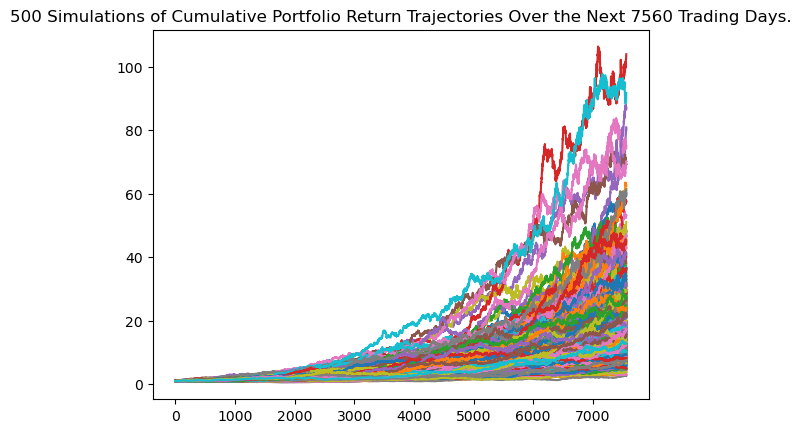

In [47]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

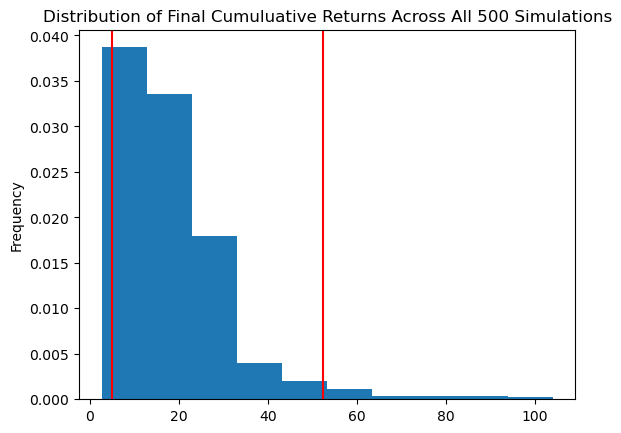

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.476428
std              12.884454
min               2.633024
25%              10.096068
50%              15.344219
75%              23.901073
max             103.930592
95% CI Lower      4.880295
95% CI Upper     52.280691
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [50]:
#Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2) # Multiplies ci_lower by 20,000 and rounds it to 2 decimals points after
ci_upper = round(tbl[9]*20000,2)# Multiplies ci_upper by 20,000 and rounds it to 2 decimals points after

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97605.91 and $1045613.82


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [51]:
# Set initial investment
initial_investment2 = 20000 *1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2) # Multiplies ci_lower by 30,000 and rounds it to 2 decimals points after
ci_upper = round(tbl[9]*30000,2)# Multiplies ci_upper by 30,000 and rounds it to 2 decimals points after


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $146408.86 and $1568420.73


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [69]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = new_port_five_year, #Specifying where to pull data
    weights = [.60,.40],#Weight of the stock
    num_simulation = 500, #Number of times the simulation is running
    num_trading_days = 252*5 # specifiying the years
)

In [53]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991769,0.991674,1.013152,0.989977,0.987371,1.001447,1.003913,1.015024,1.003020,0.990883,...,0.998692,1.002812,1.003217,0.980898,0.998766,1.000351,0.991259,1.006442,0.994057,0.997460
2,0.989651,0.982409,1.011412,0.989965,0.988960,1.008883,1.011062,1.007142,1.011298,0.999307,...,0.999916,1.005518,0.989336,0.978285,0.995933,1.006149,0.994993,1.005806,0.993792,1.004276
3,0.989996,0.978029,1.012680,1.004315,0.997352,1.015375,1.012772,1.003981,1.001967,1.000220,...,0.996951,0.998465,0.994840,0.984254,1.000901,1.008075,0.992372,1.013491,0.999931,1.004796
4,1.013807,0.978291,1.024594,0.996183,0.997234,1.008799,0.999718,1.008441,0.996020,0.980948,...,0.991303,0.985883,0.990213,0.991503,1.007416,1.009820,0.999305,1.009335,0.995786,1.019176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.268114,1.271044,1.596786,1.775587,1.627161,1.439652,1.505524,1.420434,1.238702,2.271617,...,1.428430,2.552573,1.799483,2.091594,1.495618,1.094065,1.342428,1.305890,1.505518,1.873543
1257,1.279221,1.282994,1.604485,1.790105,1.641346,1.440477,1.505374,1.409778,1.240194,2.275417,...,1.416182,2.534216,1.806399,2.064891,1.498322,1.098372,1.332773,1.294657,1.518370,1.862108
1258,1.280897,1.292153,1.583421,1.762949,1.652233,1.442853,1.501053,1.420444,1.241586,2.274526,...,1.411055,2.527405,1.810554,2.052254,1.493302,1.096887,1.343485,1.280007,1.524569,1.871810
1259,1.269879,1.291326,1.575491,1.783012,1.662107,1.435940,1.494750,1.413678,1.250647,2.273979,...,1.409073,2.535677,1.820533,2.061861,1.506638,1.091871,1.345460,1.287203,1.521078,1.859426


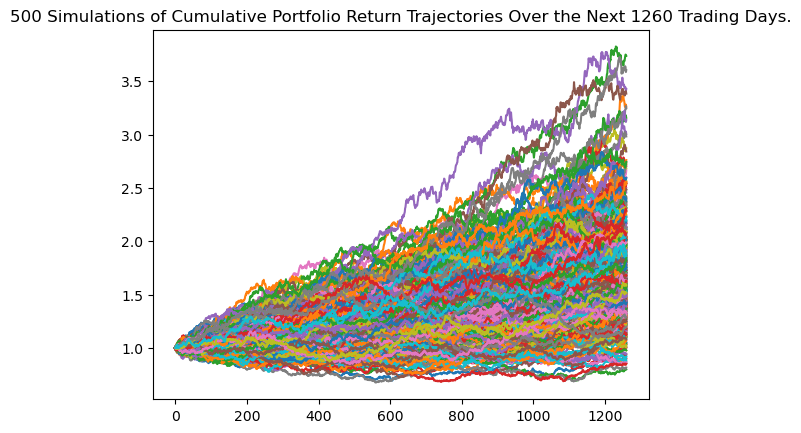

In [54]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

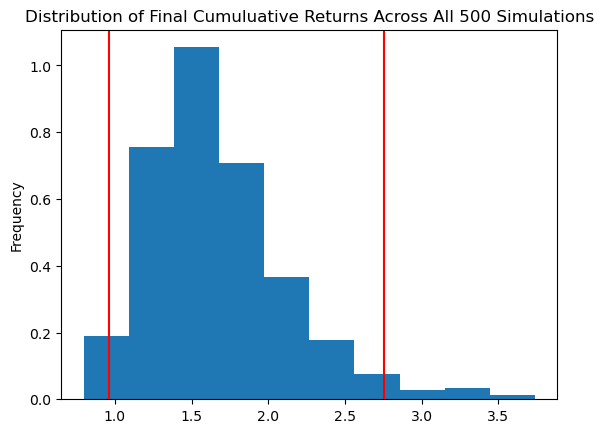

In [55]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl1 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl1)

count           500.000000
mean              1.665252
std               0.461217
min               0.798406
25%               1.353031
50%               1.590976
75%               1.917454
max               3.738511
95% CI Lower      0.961160
95% CI Upper      2.753502
Name: 1260, dtype: float64


In [57]:
# Set initial investment
initial_investment3=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl1[8]*60000,2) # Multiplies ci_lower by 60,000 and rounds it to 2 decimals points after
ci_upper_five = round(tbl1[9]*60000,2)# Multiplies ci_upper by 60,000 and rounds it to 2 decimals points after

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57669.58 and $165210.15


### Ten Years Retirement Option

In [70]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = new_port_five_year, #Specifying where to pull data
    weights = [.60,.40], #Weight of the stock
    num_simulation = 500,#Number of times the simulation is running
    num_trading_days = 252*10 #Specifiying the years
)

In [59]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995483,1.002064,0.999055,0.987677,0.994584,1.014655,0.993749,1.004316,1.002185,0.993728,...,0.999582,0.999431,0.996837,1.000716,1.000519,1.004542,0.996457,1.008849,0.984324,0.993873
2,0.990534,1.000811,1.008501,0.991839,0.995545,1.011441,0.988423,1.007883,0.998420,0.989160,...,0.997434,1.002237,1.016428,0.995586,0.996509,1.025319,1.006565,0.999546,0.994233,1.002627
3,0.994817,1.009716,1.015220,0.991797,0.999710,1.000437,0.982282,1.010518,1.000823,0.993365,...,0.994752,1.006534,1.006600,1.005079,1.001560,1.029859,1.012902,0.995684,0.994838,0.994226
4,0.993839,1.014388,1.015486,0.995791,1.003083,1.003839,0.972767,1.000505,0.993965,0.986190,...,0.996561,1.006390,1.009145,1.011940,1.008215,1.033255,1.003927,0.998104,0.997306,0.993639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.282727,1.615757,3.603015,2.217485,2.831305,2.419269,2.197774,1.664174,4.103328,2.307393,...,1.140600,1.740993,1.939810,1.788054,0.864312,2.943758,2.968165,2.062692,3.048938,4.037238
2517,2.315794,1.624249,3.594986,2.205516,2.825148,2.425296,2.213268,1.660251,4.120778,2.300203,...,1.135552,1.737678,1.959351,1.796866,0.873817,2.921903,2.949892,2.072413,3.028571,4.007817
2518,2.312498,1.620666,3.597076,2.199337,2.813233,2.385353,2.215781,1.654207,4.134010,2.303760,...,1.151995,1.736661,1.953101,1.827159,0.878082,2.925805,2.986340,2.061375,3.035323,4.000121
2519,2.325490,1.624496,3.581600,2.188047,2.860251,2.391802,2.195954,1.661934,4.160657,2.299292,...,1.171764,1.733750,1.959627,1.822305,0.890655,2.942100,3.007847,2.051576,3.024192,4.012271


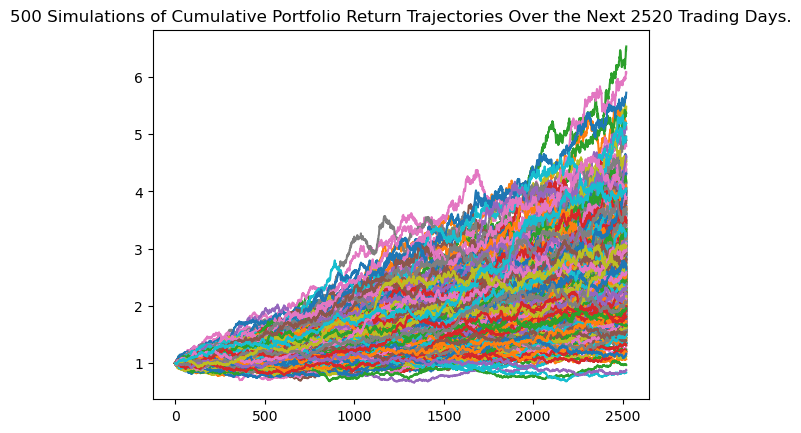

In [60]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

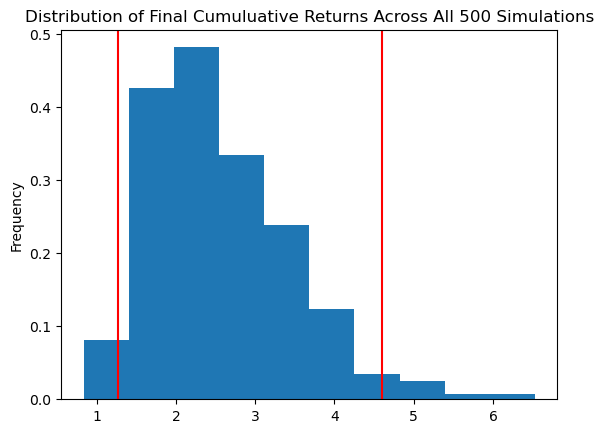

In [61]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              2.563489
std               0.892979
min               0.838910
25%               1.910783
50%               2.396800
75%               3.107216
max               6.528718
95% CI Lower      1.273758
95% CI Upper      4.600194
Name: 2520, dtype: float64


In [63]:
# Set initial investment
initial_investment3=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl3[8]*60000,2) # Multiplies ci_lower by 60,000 and rounds it to 2 decimals points after
ci_upper_ten = round(tbl3[9]*60000,2)# Multiplies ci_upper by 60,000 and rounds it to 2 decimals points after

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $76425.49 and $276011.62
